
<img src="images/5thRST_logo.png" alt="Girl in a jacket" width="900" height="700">

### NOWPAP REMOTE SENSING TRAINING COURSE  

<hr style="border:2px solid rgb(30,70,125)"> </hr>

<span style="font-family:Helvieta; font-size:2em;">Eligio Maure (maure@npec.or.jp)</span>


# How to visualize data returned by the online matchup tool 

***

<div style="text-align: left"><i> 1.2 Working with swath imagery: Satellite Chlorophyll Validation </i></div>

***

***
**Note 1**: Execute each cell through the <button class="btn btn-default btn-xs"><i class="icon-play fa fa-play"></i></button> button from the top MENU (or keyboard shortcut `Shift` + `Enter`).<br>
<br>
**Note 2**: If, for any reason, the kernel is not working anymore, in the top MENU, click on the <button class="btn btn-default btn-xs"><i class="fa fa-repeat icon-repeat"></i></button> button. Then, in the top MENU, click on "Cell" and select "Run All Above Selected Cell".<br>
***

# Table of contents
- [1. Purpose](#1.-Purpose)
- [2. Library import](#2.-Library-import)
- [3. Dataset](#3.-Dataset)
- [4. Parameter definition](#4.-Parameter-definition)
- [5. Data import](#5.-Data-import)
    - [5.1 Variables of interest in the data (exercise n.1)](#5.1-Variables-of-interest-in-the-data-(exercise-n.1))
    - [5.2 Exercise n.2 (with SGLI data)](#5.2-Exercise-n.2-(with-SGLI-data))
- [6. References](#6.-References)
***

# 1. Purpose
[Return to the "Table of contents"](#Table-of-contents)

The objective of this exercise is to visualize the satellite data product validation results obtained from the [Online Matchup Tool](https://ocean.nowpap3.go.jp/smat/) of the [Marine Environmental Watch](https://ocean.nowpap3.go.jp/?page_id=862) of Northwest Pacific Action Plan (NOWPAP).

In particular, we will display:
 
- the comparison of satellite-derived and in-situ chlorophyll (CHL) data.

The same exercise can be done for other satellite-derived geophysical values such as Remote Sensing Reflectance (Rrs), etc.
***


# 2. Library import
[Return to the "Table of contents"](#Table-of-contents)

We import all the required Python libraries. 

In [1]:
# Data manipulation
import pandas as pd
import numpy as np
from datetime import datetime
import string
from scipy import stats

# System
import sys
from pathlib import Path
from glob import glob

# Visualizations
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

%matplotlib inline

In [2]:
# custom image settings
plt.rcParams.update({
    'font.size': 25, 
    # 'axes.grid': True,
    'axes.linewidth': 2,
    'grid.linewidth': 1,
    
    'xtick.major.size': 8,
    'xtick.major.width': 2,
    
    'xtick.minor.visible': True,
    'xtick.minor.size': 4,
    'xtick.minor.width': 1,
    
    'ytick.major.size': 8,
    'ytick.major.width': 2,
    
    'ytick.minor.visible': True,
    'ytick.minor.size': 4,
    'ytick.minor.width': 1,
    
    'savefig.facecolor': '#F5F5F5'
})

We include a local library from where we import our custom fuctions.  
To be able to do so, we append the path of where the custom functions are saved before importing.
***

In [3]:
sys.path.append(Path('sutils').absolute())
import sutils as util

***
# 3. Dataset
[Back to the "Table of contents"](#Table-of-contents)

Two examples using MODIS-Aqua and SGLI are given.  
The first example with MODIS-Aqua derived CHL uses data from [NOMAD: NASA bio-Optical Marine Algorithm Dataset](https://seabass.gsfc.nasa.gov/wiki/NOMAD).  

The second is based on the [in-situ CHL data](https://ocean.nowpap3.go.jp/?page_id=2345#42_Survey_stations_and_observation_parameters) obtained from routine observations of the Northwest Pacific Region Environmental Cooperation Center ([NPEC](http://www.npec.or.jp/en/)) in Toyama Bay, Japan.
***

# 4. Parameter definition
[Back to the "Table of contents"](#Table-of-contents)   

Set all relevant parameters for our notebook. 

By convention, parameters are uppercase, while all the other variables follow Python's guidelines (lowercase).

In [4]:
INPUT_DIR = Path('sample_data').absolute()
OUTPUT_DIR = Path('outputs').absolute()

# MODIS-Aqua validation results
AQUA_FILE = [f for f in INPUT_DIR.glob('nomad_chlor_fluo_train*.matchup.csv')][0]

# SGLI validation results
SGLI_FILE = [f for f in INPUT_DIR.glob('npec_chlor_training*.matchup.csv')][0]

***
# 5. Data import
[Return to the "Table of contents"](#Table-of-contents)

We import the data for analysis using [pandas](https://pandas.pydata.org/).  
We use the pandas [`read_csv`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) function to load the output from the [Online Matchup Tool](https://ocean.nowpap3.go.jp/smat/).  

We need to tell pandas to skip header lines. We can see the number of header lines by opening the ".csv" file with a text editor (e.g. [Notepad++](https://notepad-plus-plus.org/)).

In [5]:
aqua_df = pd.read_csv(AQUA_FILE, skiprows=14)
aqua_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860 entries, 0 to 859
Data columns (total 75 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cruise            860 non-null    object 
 1   Year              860 non-null    int64  
 2   Month             860 non-null    int64  
 3   Day               860 non-null    int64  
 4   Hour              860 non-null    int64  
 5   Minute            860 non-null    int64  
 6   Second            860 non-null    int64  
 7   Lat               860 non-null    float64
 8   Lon               860 non-null    float64
 9   id                860 non-null    float64
 10  etopo2            860 non-null    float64
 11  chl               860 non-null    float64
 12  Datetime          860 non-null    object 
 13  Filename          860 non-null    object 
 14  Variable [Units]  860 non-null    object 
 15  StartDatetime     860 non-null    object 
 16  EndDatetime       860 non-null    object 
 1

***
# 5.1 Variables of interest in the data (exercise n.1)
[Return to the "Table of contents"](#Table-of-contents)   

Define the variables of interest to be extracted from the data frame

In [6]:
# Variable names
xvar = 'chl'
yvar = 'Median'

aqua_df['Variable [Units]']

0      chlor_a [mg m^-3]
1        Rrs_412 [sr^-1]
2        Rrs_443 [sr^-1]
3        Rrs_488 [sr^-1]
4        Rrs_547 [sr^-1]
             ...        
855    chlor_a [mg m^-3]
856      Rrs_412 [sr^-1]
857      Rrs_443 [sr^-1]
858      Rrs_488 [sr^-1]
859      Rrs_547 [sr^-1]
Name: Variable [Units], Length: 860, dtype: object

We use `Pandas` indexing to select specific data.  
`isin` will check all variable name with `'chlor_a [mg m^-3]'` in them and return `True` or `False` depending on the result.

In [7]:
idx = aqua_df['Variable [Units]'].isin(['chlor_a [mg m^-3]'])

`loc` selects data at specific rows and columns of our data frame

In [8]:
x = aqua_df.loc[idx, xvar]
y = aqua_df.loc[idx, yvar]
x, y

(0      0.38200
 5      0.26900
 10     0.14400
 15     0.14400
 20     0.04700
         ...   
 835    2.54190
 840    2.95997
 845    0.95114
 850    4.54228
 855    5.80693
 Name: chl, Length: 172, dtype: float64,
 0      0.189312
 5      0.157163
 10     0.124930
 15     0.140566
 20     0.056998
          ...   
 835    4.867412
 840    2.071994
 845    0.858682
 850    1.390481
 855    2.334020
 Name: Median, Length: 172, dtype: float64)

Let's display the results for MODIS-Aqua

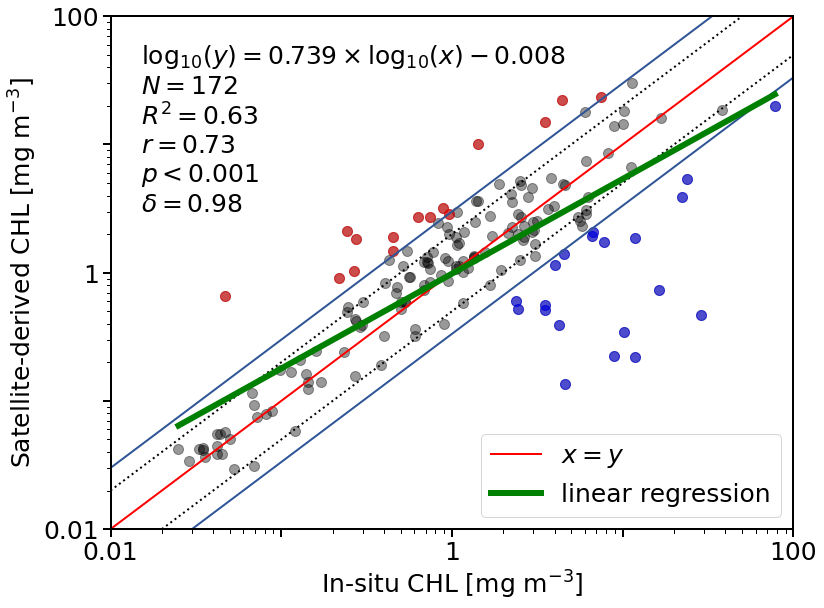

In [9]:
# initialise matplotlib figure
fig, ax = plt.subplots(figsize=(12,9))

# Display scatter
s = 100
ax.scatter(
    x, y,
    c='k',
    marker='o',
    alpha=0.4,
    s=s,
)

# Set axis labels
ax.set_xlabel('In-situ CHL [mg m$^{-3}$]')
ax.set_ylabel(f'Satellite-derived CHL [mg m$^{{-3}}$]')

# Set the scale to log
ax.set_xscale('log')
ax.set_yscale('log')

# Set axis limits
ax.set_xlim([0.01, 100])
ax.set_ylim([0.01, 100])

# Identity line
util.identity_line(ax=ax, lines=[1, 2, 3])

# Configure ticks
util.logticks(ax=ax, n=2)
            
# overestimate
xov, yov = util.overestimated(x=x.to_numpy(),
                              y=y.to_numpy(), 
                              ratio=3)
ax.scatter(xov, yov, s=s, c='r', marker='o', alpha=0.5) 

# underestimate
xun, yun = util.underestimated(x=x.to_numpy(),
                               y=y.to_numpy(), 
                               ratio=3)
ax.scatter(xun, yun, s=s, c='b', marker='o', alpha=0.5)
    
# Regression line
mask = np.isnan(x.to_numpy()) | np.isnan(y.to_numpy())
result = util.regress(x=x.to_numpy()[~mask].flatten(),
                      y=y.to_numpy()[~mask].flatten(), 
                      scale='log-log')
rl = ax.plot(result.xp, result.yp, '-g', label='linear regression', lw=6)

plt.legend(loc='lower right')
ax.text(.015, 3, result.desc)

# plt.title('0 m', loc='left')
plt.tight_layout()
day = datetime.today().strftime('%Y%m%d')
plt.savefig(OUTPUT_DIR.joinpath(f'{day}_modis_aqua_validation'), dpi=200)

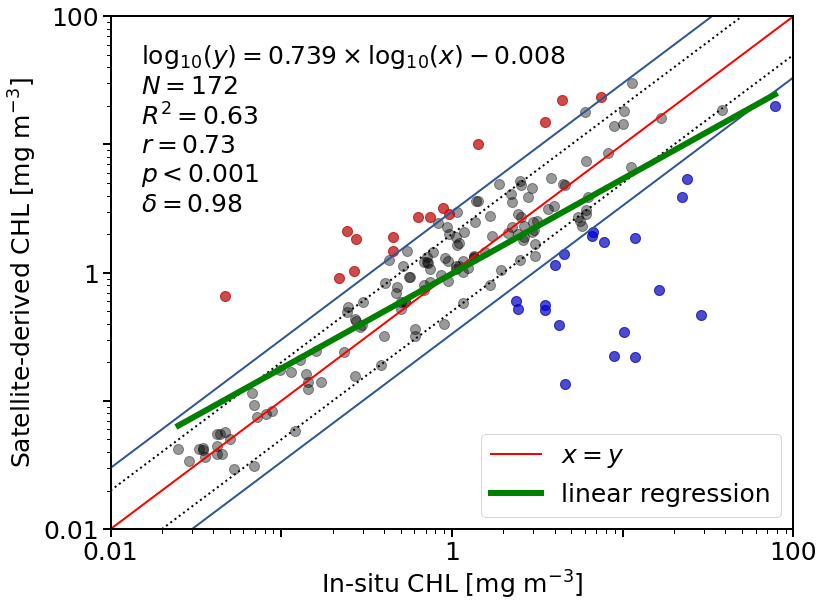

# 5.2 Exercise n.2 (with SGLI data)

[Return to the "Table of contents"](#Table-of-contents)   

We can wrap the ploting into a function and the repeat the same exercise with SGLI data.

In [10]:
def validation(x, y, xlabel: str, ylabel: str, xscale: str='log', yscale: str='log', 
               xlim: list=[0.01, 100], ylim: list=[0.01, 100], id_lines: list = [1, 2, 3], 
               s: int=100, alpha: float=0.4, marker: str='o', figure_name: str = None):
    
    fig, ax = plt.subplots(figsize=(12, 9))

    # Display scatter
    ax.scatter(
        x, y,
        c='k',
        marker=marker,
        alpha=alpha,
        s=s,
    )

    # Set axis labels
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    # Set the scale to log
    ax.set_xscale(xscale)
    ax.set_yscale(xscale)

    # Set axis limits
    ax.set_xlim(*xlim)
    ax.set_ylim(*ylim)

    # Identity line
    util.identity_line(ax=ax, id_lines=id_lines)

    # Configure ticks
    util.logticks(ax=ax, n=2)

    # overestimate
    xov, yov = util.overestimated(x=x.to_numpy(),
                                  y=y.to_numpy(), 
                                  ratio=id_lines[-1])
    ax.scatter(xov, yov, s=s, c='r', marker='o', alpha=0.5) 

    # underestimate
    xun, yun = util.underestimated(x=x.to_numpy(),
                                   y=y.to_numpy(), 
                                   ratio=id_lines[-1])
    ax.scatter(xun, yun, s=s, c='b', marker='o', alpha=0.5)

    # Regression line
    mask = np.isnan(x.to_numpy()) | np.isnan(y.to_numpy())
    result = util.regress(x=x.to_numpy()[~mask].flatten(),
                          y=y.to_numpy()[~mask].flatten(), 
                          scale=f'{xcale}-{yscale}')
    rl = ax.plot(result.xp, result.yp, '-g', label='linear regression', lw=6)

    plt.legend(loc='lower right')
    t = ax.text(.015, 3, result.desc)
    
    if figure_name:
        plt.tight_layout()
        plt.savefig(OUTPUT_DIR.joinpath(figure_name), dpi=200)
    return 

In [11]:
sgli_df = pd.read_csv(SGLI_FILE, skiprows=14)
sgli_df.info()

NameError: name 'SGLI_FILE' is not defined

In [ ]:
# Variable names
xvar = 'chl'
yvar = 'Median'

sgli_df['Variable [Units]']

<div class="alert alert-block alert-warning">
    
**The dataset is 3D! You have depth levels!**

The xarray dataset ***ds*** is extracted from the dataset ***global-analysis-forecast-bio-001-028-monthly***  which is a **3D dataset**        

<div class="alert alert-block alert-success">
    <b>Done!</b><br>
  
--- 

#### And thank you for your attention! :) 
    We hope you enjoyed the training provided by the Northwest Pacific Action Plan.

# 6. Resources
[Go back to the "Table of contents"](#Table-of-contents)
1. https://ocean.nowpap3.go.jp/smat/
2. https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
3. https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html
4. https://ocean.nowpap3.go.jp/?page_id=862